In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

In [3]:
# hyper-parameters
batch_size = 5
# 2 categories of images (Symptoms and no symptoms)
num_classes = 2
# number of training epochs
epochs = 20

In [4]:
pd.set_option("display.precision", 8)

In [5]:
data_root='/content/gdrive/My Drive/Colab Notebooks/dataset/training'

In [6]:
# making array of all image files to analyse
import os
train_symp = []
for x in os.listdir(data_root+"/symptoms/"):
  train_symp.append(data_root+"/symptoms/"+x)
train_nosymp = []
for x in os.listdir(data_root+"/nosymptoms/"):
  train_nosymp.append(data_root+"/nosymptoms/"+x)
print(len(train_symp), len(train_nosymp))

549 1422


In [7]:
# checking if all have uniform shape
# defining lambda to check shape
import cv2
from google.colab.patches import cv2_imshow
shapes_train = []
for x in train_symp:
  x = cv2.imread(x)
  shapes_train.append(x.shape)

KeyboardInterrupt: ignored

In [ ]:
shapes_train[1]

In [ ]:
x = [p[0] for p in shapes_train]
y = [p[1] for p in shapes_train]

plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [8]:
img_size = 500
data_symp = []

In [ ]:
i = 0
for x in train_symp:
  img = cv2.imread(x)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (img_size, img_size))
  org = img

  # circle crop
  height,width, _ = img.shape
  x = int(width/2)
  y = int(height/2)
  r = np.amin((x,y))

  circle_img = np.zeros((height, width), np.uint8)
  cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
  img = cv2.bitwise_and(img, img, mask=circle_img)

 # gaussian blur
  img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , 30) ,-4 ,128)

  cv2.imwrite(data_root+"/imgpr_symp"+"/"+str(i)+".jpg", img)
  i = i+1
  v 

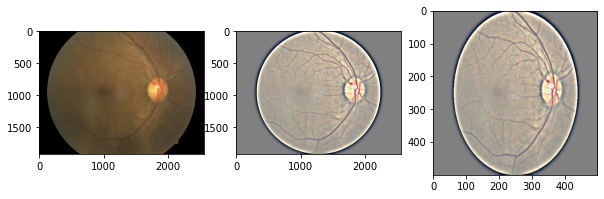

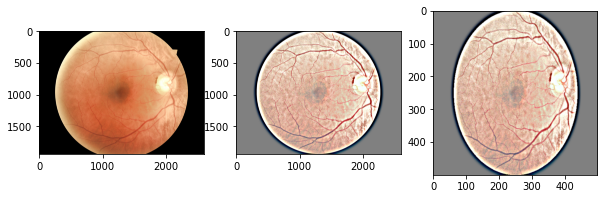

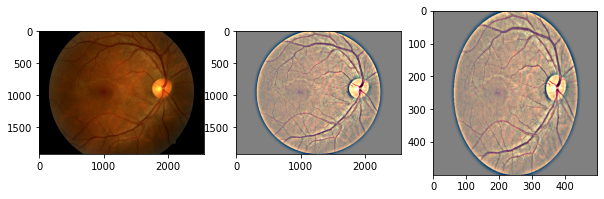

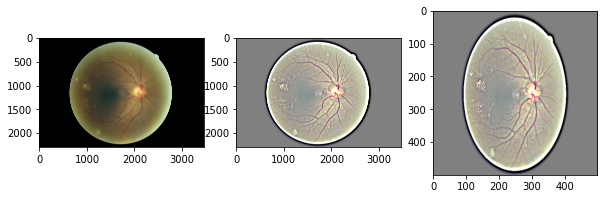

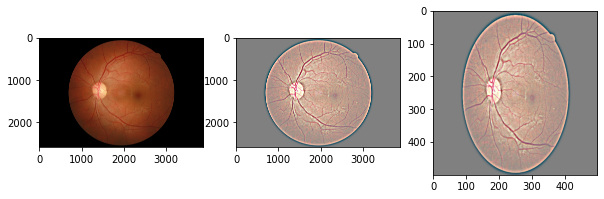

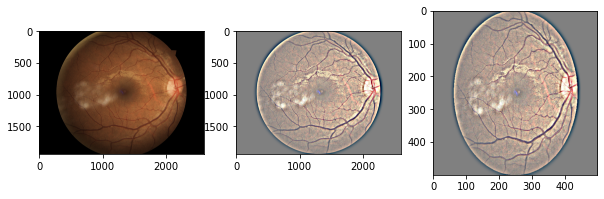

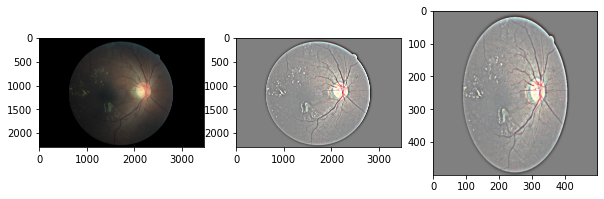

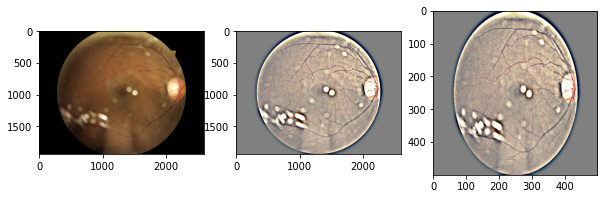

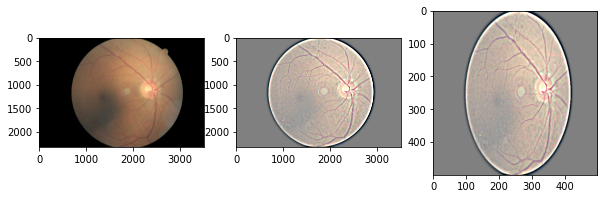

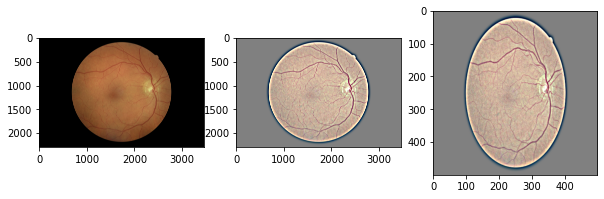

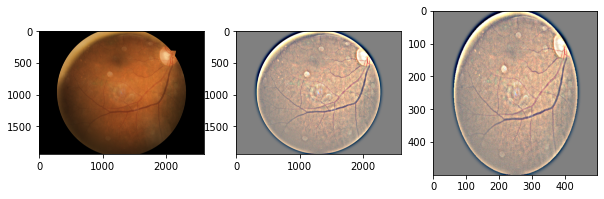

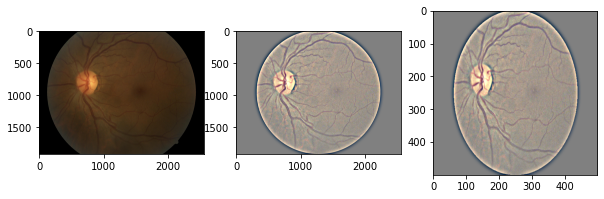

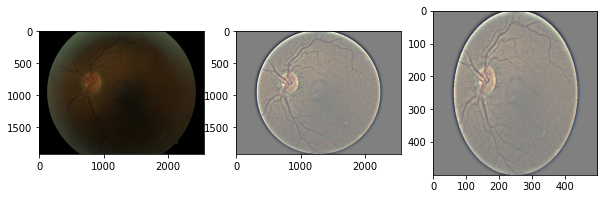

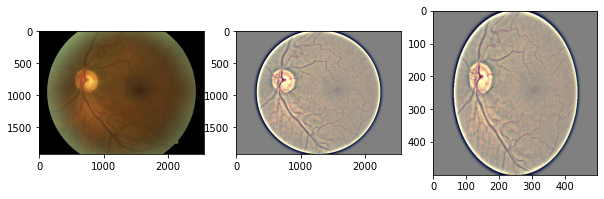

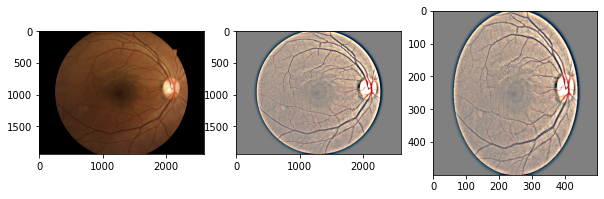

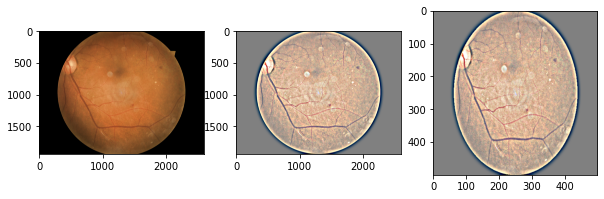

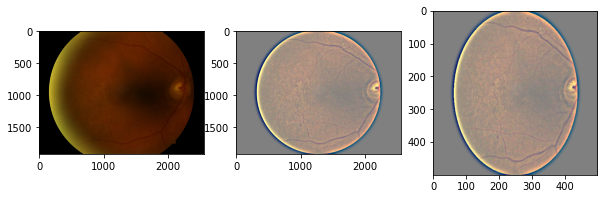

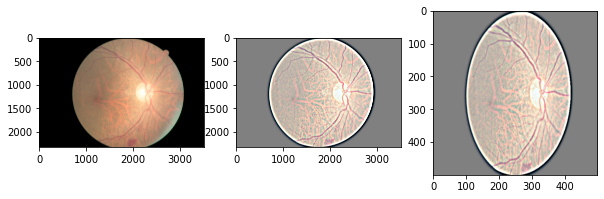

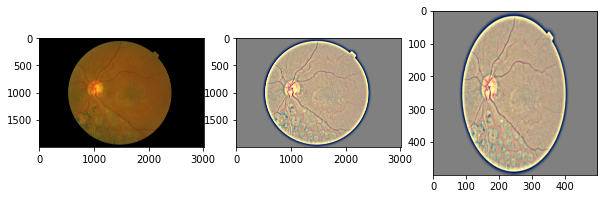

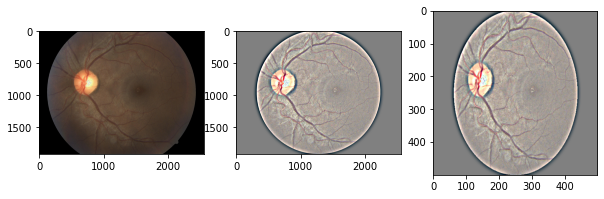

In [20]:
i = 0
for x in train_symp[:20]:
  img = cv2.imread(x)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  org = img

    # circle crop
  height,width, _ = img.shape
  x = int(width/2)
  y = int(height/2)
  r = np.amin((x,y))

  circle_img = np.zeros((height, width), np.uint8)
  cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
  img = cv2.bitwise_and(img, img, mask=circle_img)

  # gaussian blur
  img = cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , 30) ,-4 ,128)

  # resize
  img1 = cv2.resize(img, (500, 500), interpolation=cv2.INTER_NEAREST)

  f, axarr = plt.subplots(1, 3, figsize=(10,10))
  axarr[0].imshow(org)
  axarr[1].imshow(img)
  axarr[2].imshow(img1)
  plt.show()
  

In [ ]:
                                                                                                                mask = cv2.circle()